In [1]:
from IPython.display import HTML, display

def project_overview():
    html = """
    <div style="
background: radial-gradient(circle,rgba(174, 238, 177, 1) 0%, rgba(148, 187, 233, 1) 100%);
        color: black;
        padding: 25px 35px;
        border-radius: 18px;
        box-shadow: 0 6px 20px rgba(0,0,0,0.15);
        font-family: 'Poppins', 'Segoe UI', sans-serif;
        line-height: 1.7;
        text-align: center;
    ">
        <h2 style="
            margin-top: 0;
            font-size: 30px;
            font-weight: 700;
            color:white;
            background: linear-gradient(90deg, #000000, #434343);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
        ">
            📘 Project Overview: CLIP Image–Text Similarity
        </h2>

        <p style="font-size: 16px; margin-top: 10px;">
            This small project helps us understand how modern AI models like
            <b>CLIP (Contrastive Language–Image Pretraining)</b> can look at an image
            and also read text — and then find how closely they are related!
            Using the <b>SentenceTransformer</b> library, we turn both the image and
            the text into numbers (called <b>embeddings</b>) so that the computer can
            compare them easily.  
            The goal is to see which text description best matches a given image —
            just like how our brain connects words with pictures.
        </p>

        <h3 style="color:black; margin-top: 25px;">🎯 Learning Outcomes</h3>
        <ul style="
            font-size:16px;
            margin-top:10px;
            list-style-position: inside;
            text-align: left;
            display: inline-block;
            line-height: 1.8;
        ">
            <li>Learn how AI connects <b>images</b> and <b>text</b> together.</li>
            <li>Use the <b>CLIP ViT-B-32</b> model through the <b>SentenceTransformer</b> library.</li>
            <li>Understand how to calculate <b>similarity scores</b> between image and text.</li>
            <li>Practice visualizing and interpreting results with <b>Matplotlib</b>.</li>
            <li>See how this idea is used in real apps like <b>Google Images</b> or <b>AI-based search engines</b>.</li>
        </ul>

        <h3 style="color:black; margin-top: 25px;">🧩 Tools & Technologies</h3>
        <p style="font-size:16px; margin-top: 8px;">
            <b>Python</b> • <b>SentenceTransformers</b> •
            <b>PIL</b> • <b>NumPy</b> • <b>Matplotlib</b>
        </p>

        <p style="margin-top:25px; font-style: italic; color: #333;">

        </p>
    </div>
    """
    display(HTML(html))

project_overview()

In [2]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load the model
model = SentenceTransformer("clip-ViT-B-32")

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: C:\Users\bablu\.cache\huggingface\hub\models--sentence-transformers--clip-ViT-B-32\snapshots\327ab6726d33c0e22f920c83f2ff9e4bd38ca37f\0_CLIPModel
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
vision_model.embeddings.position_ids | UNEXPECTED |  | 
text_model.embeddings.position_ids   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [3]:
bablu=r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\2.jpeg"


In [4]:
img1 = Image.open(bablu)

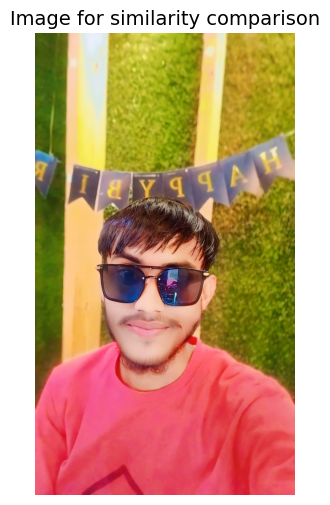

In [5]:
# Display the image
plt.figure(figsize=(6,6))          # make it larger
plt.imshow(img1)                    # display image data
plt.axis('off')                    # hide axis
plt.title("Image for similarity comparison", fontsize=14)
plt.show()                         # show the image

In [6]:
# Your data
text_descriptions = [
    "One Elephant in the snow",
    "A cat on in garden",
    "A picture of London at night",
    "A happy dog playing fetch",
    "A dog sleeping on a couch",
    "Two cats fighting in a garden",
    "One Horse Running in park",
    "Bitu Kumar",
    "Bablu Sarkar",
    "indian Insititute of Technology (IIT Bombay)"
]

In [11]:
def display_image_and_compare(image_path, text_description):
    # Load the image
    img = Image.open(image_path)

    # Encode text descriptions and image
    text_emb = model.encode(text_description)
    img_emb = model.encode(img)

    # Compute similarity scores
    similarity_score = np.dot(text_emb, img_emb.T)

    # Find the best match
    best_match_index = np.argmax(similarity_score)
    best_match_desc = text_description[best_match_index]

    # Print best match info
    print(f"\nBest match for the image is: '{best_match_desc}' with a score of {similarity_score[best_match_index]:.4f}")
    # Display the image
    plt.figure(figsize=(6,7))          # make it larger
    plt.imshow(img)                    # display image data
    plt.axis('off')                    # hide axis
    plt.title(f"Image for similarity comparison {best_match_desc}", fontsize=14, c='r')
    plt.show()                         # show the image


Best match for the image is: 'Bablu Sarkar' with a score of 33.4892


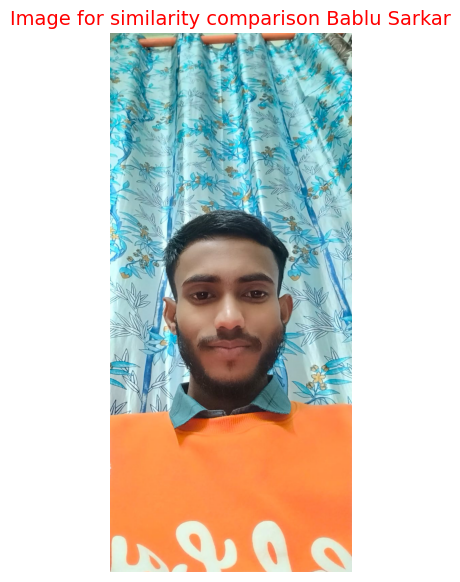

In [12]:
bablu =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\01.jpeg"
display_image_and_compare(bablu, text_descriptions)


Best match for the image is: 'A dog sleeping on a couch' with a score of 26.2334


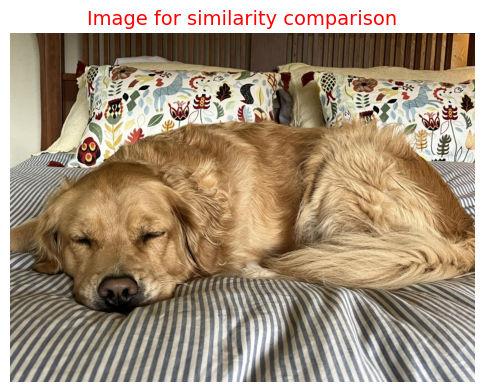

In [9]:
image =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\dog1.jpg"
display_image_and_compare(image, text_descriptions)


Best match for the image is: 'indian Insititute of Technology (IIT Bombay)' with a score of 28.6834


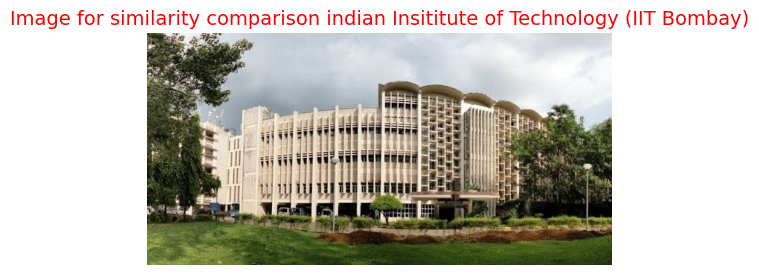

In [13]:
image =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\iitbombay.jpg"
display_image_and_compare(image, text_descriptions)


Best match for the image is: 'Bitu Kumar' with a score of 29.4923


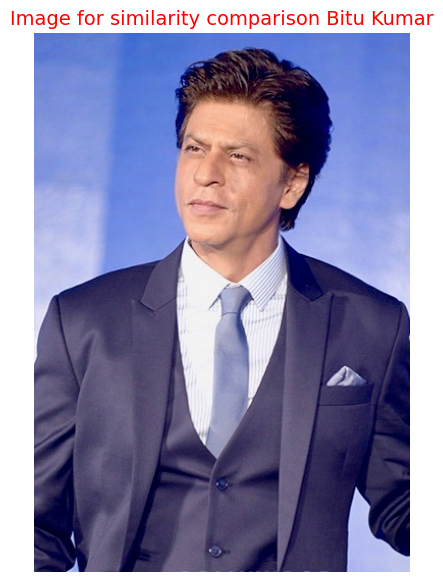

In [14]:
image =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\saru.jpg"
display_image_and_compare(image, text_descriptions) ## This is an Error


Best match for the image is: 'A cat on in garden' with a score of 27.6262


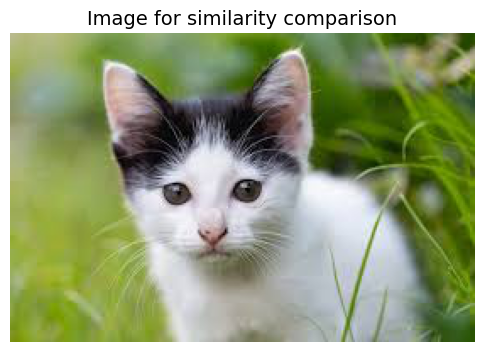

In [34]:
image =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\images.jpg"
display_image_and_compare(image, text_descriptions)


Best match for the image is: 'Bitu Kumar' with a score of 29.2589


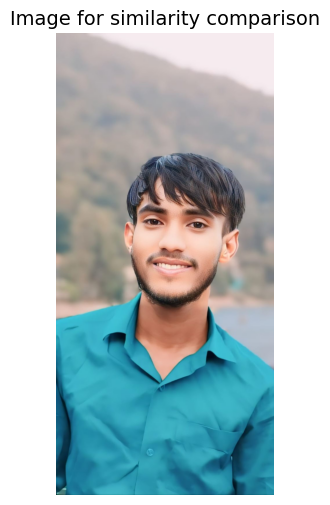

In [33]:
image =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\4.jpeg"
display_image_and_compare(image, text_descriptions)

In [16]:
text_descriptions.append(["Salman Khan is sitting on a bench","Salman is an actor in Bollywood."])
salmankhan =r"C:\Users\bablu\OneDrive\Desktop\Data_Analaytics_Project\Image Recogination\salmankhan.jpg"
# display_image_and_compare(salmankhan, text_descriptions)
print(text_descriptions)

['One Elephant in the snow', 'A cat on in garden', 'A picture of London at night', 'A happy dog playing fetch', 'A dog sleeping on a couch', 'Two cats fighting in a garden', 'One Horse Running in park', 'Bitu Kumar', 'Bablu Sarkar', 'indian Insititute of Technology (IIT Bombay)', ['Salman Khan is sitting on a bench', 'Salman is an actor in Bollywood.'], ['Salman Khan is sitting on a bench', 'Salman is an actor in Bollywood.']]
